# Pandas Library

In [45]:
import numpy as np

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [2]:
print(pd.__version__)

2.2.2


# Create Pandas Series

In [61]:
arr=[1,2,3,4,5]
s1=pd.Series(arr)

In [62]:
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

# Dictionary into Pandas

In [63]:
dict1={'a':4,'b':5,'c':8}

In [66]:
s2=pd.Series(dict1)

In [67]:
s2

a    4
b    5
c    8
dtype: int64

# Creating Pandas DataFrame (always use second bracket)

In [68]:
data={'name':['Asif','Parvez','Naharul','Asad','Rakib','Asifa'],
      'Age':[25,40,34,20,75,28],
      'Sex':['male','male','male','male','male','female'],
      }

In [3]:
data

{'name': ['Asif', 'Parvez', 'Naharul', 'Asad', 'Rakib', 'Asifa'],
 'Age': [25, 40, 34, 20, 75, 28],
 'Sex': ['male', 'male', 'male', 'male', 'male', 'female']}

# Convert DataFrame into Dictionary

In [69]:
df=pd.DataFrame(data)

In [70]:
df

,name,Age,Sex
0,Asif,25,male
1,Parvez,40,male
2,Naharul,34,male
3,Asad,20,male
4,Rakib,75,male
5,Asifa,28,female


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   Age     6 non-null      int64 
 2   Sex     6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [13]:
df.isnull()

,name,Age,Sex
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False


In [14]:
df.isnull().sum()

name    0
Age     0
Sex     0
dtype: int64

In [15]:
df.describe()

,Age
count,6.000000
mean,37.000000
std,19.879638
min,20.000000
25%,25.750000
50%,31.000000
75%,38.500000
max,75.000000


# 66.67% Data lies on 1 Standard Deviation
# 88.7%% Data lies on 2 Standard Deviation
# 99.98% Data lies on 3 Standard Deviation

In [71]:
df['Age'].mean()

np.float64(37.0)

In [72]:
abs(df['Age']-37)

0    12
1     3
2     3
3    17
4    38
5     9
Name: Age, dtype: int64

In [19]:
abs(df['Age']-30)

0     5
1    10
2     4
3    10
4    45
5     2
Name: Age, dtype: int64

In [73]:
df['Age'].min()

np.int64(20)

In [74]:
df['Age'].max()

np.int64(75)

In [75]:
df['Cum_Age']=df['Age'].cumsum()

In [76]:
df

,name,Age,Sex,Cum_Age
0,Asif,25,male,25
1,Parvez,40,male,65
2,Naharul,34,male,99
3,Asad,20,male,119
4,Rakib,75,male,194
5,Asifa,28,female,222


In [77]:
df.head(3)

,name,Age,Sex,Cum_Age
0,Asif,25,male,25
1,Parvez,40,male,65
2,Naharul,34,male,99


In [78]:
df.tail(10)

,name,Age,Sex,Cum_Age
0,Asif,25,male,25
1,Parvez,40,male,65
2,Naharul,34,male,99
3,Asad,20,male,119
4,Rakib,75,male,194
5,Asifa,28,female,222


In [79]:
df['Age']>=30

0    False
1     True
2     True
3    False
4     True
5    False
Name: Age, dtype: bool

In [82]:
df1=[df['Age']>=30]

In [14]:
df['Sex'].value_counts()

Sex
male      5
female    1
Name: count, dtype: int64

In [29]:
df[df['Sex']=='male']

,name,Age,Sex
0,Asif,25,male
1,Parvez,40,male
2,Naharul,34,male
3,Asad,20,male
4,Rakib,75,male


In [30]:
df1=df['Age']

In [20]:
df1

0    25
1    40
2    34
3    20
4    75
5    28
Name: Age, dtype: int64

In [96]:
df1=df[['Age'], ['Sex']].corr()


InvalidIndexError: (['Age'], ['Sex'])

# We should exclude highly correlated values to avoid overfitting

In [98]:
df1=df['Dup_Age']=df['Age']

In [99]:
df1

0    25
1    40
2    34
3    20
4    75
5    28
Name: Age, dtype: int64

In [102]:
df['Dup_age'] = df['Age']


In [103]:
df

,name,Age,Sex,Cum_Age,Dup_Age,Dup_age
0,Asif,25,male,25,25,25
1,Parvez,40,male,65,40,40
2,Naharul,34,male,99,34,34
3,Asad,20,male,119,20,20
4,Rakib,75,male,194,75,75
5,Asifa,28,female,222,28,28


In [104]:
df1 = df[['Age', 'Dup_age']].corr()


In [105]:
df1

,Age,Dup_age
Age,1.0,1.0
Dup_age,1.0,1.0


# We use Median when values are Categorical and there is Outlier in the Dataset

In [86]:
df['Sex'].mode()

0    male
Name: Sex, dtype: object

In [87]:
df['Age'].mode()

0    20
1    25
2    28
3    34
4    40
5    75
Name: Age, dtype: int64

# When there is no Outlier in that case Mean gives us better result

In [106]:
df_sorted = df.sort_values(by='Age')


In [107]:
print(df_sorted)


      name  Age     Sex  Cum_Age  Dup_Age  Dup_age
3     Asad   20    male      119       20       20
0     Asif   25    male       25       25       25
5    Asifa   28  female      222       28       28
2  Naharul   34    male       99       34       34
1   Parvez   40    male       65       40       40
4    Rakib   75    male      194       75       75


In [108]:
df1.sort_values(by='Age',ascending=False)

,Age,Dup_age
Age,1.0,1.0
Dup_age,1.0,1.0


In [109]:
df1

,Age,Dup_age
Age,1.0,1.0
Dup_age,1.0,1.0


# Sorting

In [110]:
df1.sort_values(by='Age',ascending=False,inplace=True)

In [111]:
df1

,Age,Dup_age
Age,1.0,1.0
Dup_age,1.0,1.0


In [112]:
df1.reset_index()

,index,Age,Dup_age
0,Age,1.0,1.0
1,Dup_age,1.0,1.0


In [113]:
df1.reset_index(inplace=True,drop=True)

In [114]:
df1

,Age,Dup_age
0,1.0,1.0
1,1.0,1.0


In [115]:
data={'name':['Asif','Parvez','Naharul','Asad','Rakib','Asifa'],
      'Age':[25,40,34,20,75,28],
      'Sex':['male','male','male','male','male','female'],
      }

In [116]:
df2=pd.DataFrame(data)

In [117]:
df2

,name,Age,Sex
0,Asif,25,male
1,Parvez,40,male
2,Naharul,34,male
3,Asad,20,male
4,Rakib,75,male
5,Asifa,28,female


In [118]:
df2.sort_values(by='Age',ascending=False)

,name,Age,Sex
4,Rakib,75,male
1,Parvez,40,male
2,Naharul,34,male
5,Asifa,28,female
0,Asif,25,male
3,Asad,20,male


In [119]:
df2.reset_index(inplace=True,drop=True)

In [120]:
df2

,name,Age,Sex
0,Asif,25,male
1,Parvez,40,male
2,Naharul,34,male
3,Asad,20,male
4,Rakib,75,male
5,Asifa,28,female


In [60]:
df1.drop('index',axis=1)

KeyError: "['index'] not found in axis"

In [121]:
data={'name':['Asif','Parvez','Naharul',np.nan,'Asad','Rakib','Asifa'],
      'Age':[25,40,34,20,75,np.nan,28],
      'Sex':['male','male','male','female','male','male','female'],
      }

In [122]:
df3=pd.DataFrame(data)

In [123]:
df3

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
3,NaN,20.0,female
4,Asad,75.0,male
5,Rakib,NaN,male
6,Asifa,28.0,female


In [58]:
df3.isnull().sum()

name    1
Age     1
Sex     0
dtype: int64

In [59]:
df3.dropna()

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
4,Asad,75.0,male
6,Asifa,28.0,female


In [3]:
import pandas as pd

# Create the dataset
data = {
    "Date": ["2024-07-01", "2024-07-01", "2024-07-01", "2024-07-02", "2024-07-02", "2024-07-02", "2024-07-03", "2024-07-03", "2024-07-03"],
    "Product": ["Apples", "Bananas", "Oranges", "Apples", "Bananas", "Oranges", "Apples", "Bananas", "Oranges"],
    "Category": ["Fruit", "Fruit", "Fruit", "Fruit", "Fruit", "Fruit", "Fruit", "Fruit", "Fruit"],
    "Units Sold": [150, 200, 100, 120, 180, 90, 140, 210, 110],
    "Unit Price": [0.50, 0.30, 0.70, 0.50, 0.30, 0.70, 0.50, 0.30, 0.70],
    "Revenue": [75.00, 60.00, 70.00, 60.00, 54.00, 63.00, 70.00, 63.00, 77.00],
    "Store Location": ["New York", "New York", "New York", "Los Angeles", "Los Angeles", "Los Angeles", "Chicago", "Chicago", "Chicago"]
}

# Load the data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location
0,2024-07-01,Apples,Fruit,150,0.5,75.0,New York
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York
2,2024-07-01,Oranges,Fruit,100,0.7,70.0,New York
3,2024-07-02,Apples,Fruit,120,0.5,60.0,Los Angeles
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles
5,2024-07-02,Oranges,Fruit,90,0.7,63.0,Los Angeles
6,2024-07-03,Apples,Fruit,140,0.5,70.0,Chicago
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago
8,2024-07-03,Oranges,Fruit,110,0.7,77.0,Chicago


In [4]:
df.describe()

,Units Sold,Unit Price,Revenue
count,9.000000,9.000000,9.000000
mean,144.444444,0.500000,65.777778
std,43.906466,0.173205,7.644897
min,90.000000,0.300000,54.000000
25%,110.000000,0.300000,60.000000
50%,140.000000,0.500000,63.000000
75%,180.000000,0.700000,70.000000
max,210.000000,0.700000,77.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            9 non-null      object 
 1   Product         9 non-null      object 
 2   Category        9 non-null      object 
 3   Units Sold      9 non-null      int64  
 4   Unit Price      9 non-null      float64
 5   Revenue         9 non-null      float64
 6   Store Location  9 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 636.0+ bytes


In [6]:
total_revenue_by_product = df.groupby('Product')['Revenue'].sum()


In [7]:
total_revenue_by_product


Product
Apples     205.0
Bananas    177.0
Oranges    210.0
Name: Revenue, dtype: float64

In [8]:
filtered_df = df[df['Units Sold'] > 150]


In [9]:
filtered_df

,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago


In [12]:
df['Total Cost'] = df['Units Sold'] * df['Unit Price']

df

,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location,Total Cost
0,2024-07-01,Apples,Fruit,150,0.5,75.0,New York,75.0
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York,60.0
2,2024-07-01,Oranges,Fruit,100,0.7,70.0,New York,70.0
3,2024-07-02,Apples,Fruit,120,0.5,60.0,Los Angeles,60.0
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles,54.0
5,2024-07-02,Oranges,Fruit,90,0.7,63.0,Los Angeles,63.0
6,2024-07-03,Apples,Fruit,140,0.5,70.0,Chicago,70.0
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago,63.0
8,2024-07-03,Oranges,Fruit,110,0.7,77.0,Chicago,77.0


In [13]:
import matplotlib.pyplot as plt


In [14]:
revenue_by_location = df.groupby('Store Location')['Revenue'].sum()


<Axes: xlabel='Store Location'>

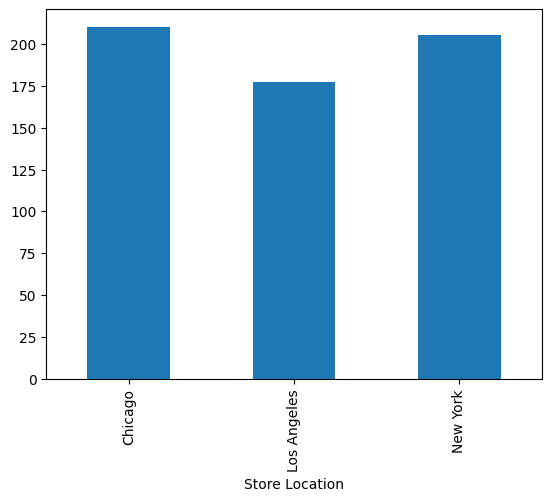

In [15]:
revenue_by_location.plot(kind='bar')


In [16]:
sorted_by_units_sold = df.sort_values(by='Units Sold')


In [23]:
sorted_by_revenue_asc = df.sort_values(by='Revenue', ascending=True)


In [18]:
sorted_by_date_product = df.sort_values(by=['Date', 'Product'])


In [25]:
(sorted_by_units_sold)


,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location,Total Cost
5,2024-07-02,Oranges,Fruit,90,0.7,63.0,Los Angeles,63.0
2,2024-07-01,Oranges,Fruit,100,0.7,70.0,New York,70.0
8,2024-07-03,Oranges,Fruit,110,0.7,77.0,Chicago,77.0
3,2024-07-02,Apples,Fruit,120,0.5,60.0,Los Angeles,60.0
6,2024-07-03,Apples,Fruit,140,0.5,70.0,Chicago,70.0
0,2024-07-01,Apples,Fruit,150,0.5,75.0,New York,75.0
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles,54.0
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York,60.0
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago,63.0


In [24]:
sorted_by_revenue_asc

,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location,Total Cost
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles,54.0
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York,60.0
3,2024-07-02,Apples,Fruit,120,0.5,60.0,Los Angeles,60.0
5,2024-07-02,Oranges,Fruit,90,0.7,63.0,Los Angeles,63.0
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago,63.0
2,2024-07-01,Oranges,Fruit,100,0.7,70.0,New York,70.0
6,2024-07-03,Apples,Fruit,140,0.5,70.0,Chicago,70.0
0,2024-07-01,Apples,Fruit,150,0.5,75.0,New York,75.0
8,2024-07-03,Oranges,Fruit,110,0.7,77.0,Chicago,77.0


In [22]:
sorted_by_date_product

,Date,Product,Category,Units Sold,Unit Price,Revenue,Store Location,Total Cost
0,2024-07-01,Apples,Fruit,150,0.5,75.0,New York,75.0
1,2024-07-01,Bananas,Fruit,200,0.3,60.0,New York,60.0
2,2024-07-01,Oranges,Fruit,100,0.7,70.0,New York,70.0
3,2024-07-02,Apples,Fruit,120,0.5,60.0,Los Angeles,60.0
4,2024-07-02,Bananas,Fruit,180,0.3,54.0,Los Angeles,54.0
5,2024-07-02,Oranges,Fruit,90,0.7,63.0,Los Angeles,63.0
6,2024-07-03,Apples,Fruit,140,0.5,70.0,Chicago,70.0
7,2024-07-03,Bananas,Fruit,210,0.3,63.0,Chicago,63.0
8,2024-07-03,Oranges,Fruit,110,0.7,77.0,Chicago,77.0


# Null Value with Mean


In [33]:
import numpy as np
import pandas as pd

data={'name':['Asif','Parvez','Naharul','Asad','Rakib','Asifa'],
      'Age':[25,40,34,20,75,np.nan,28],
      'Sex':['male','male','male','female',np.nan,'male','male','female'],
      }


In [38]:
df=pd.DataFrame(data)
df

,name,Age,Sex
0,Asif,25,male
1,Parvez,40,male
2,Naharul,34,male
3,Asad,20,male
4,Rakib,75,male
5,Asifa,28,female


In [41]:
data={'name':['Asif','Parvez','Naharul','Hasan','Asad','Rakib','Asifa'],
      'Age':[25,40,34,20,75,np.nan,28],
      'Sex':['male','male','male','female',np.nan,'male','female'],
      }

In [42]:
df=pd.DataFrame(data)


In [44]:
df

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
3,Hasan,20.0,female
4,Asad,75.0,NaN
5,Rakib,NaN,male
6,Asifa,28.0,female


# changing age value

In [46]:
df['Age']

0    25.0
1    40.0
2    34.0
3    20.0
4    75.0
5     NaN
6    28.0
Name: Age, dtype: float64

In [49]:
df['Age'].fillna(df['Age'].mean())

0    25.0
1    40.0
2    34.0
3    20.0
4    75.0
5    37.0
6    28.0
Name: Age, dtype: float64

In [50]:
df

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
3,Hasan,20.0,female
4,Asad,75.0,NaN
5,Rakib,NaN,male
6,Asifa,28.0,female


In [53]:
x=df['Age'].fillna(df['Age'].mean())

In [54]:
x

0    25.0
1    40.0
2    34.0
3    20.0
4    75.0
5    37.0
6    28.0
Name: Age, dtype: float64

In [55]:
type(x)

pandas.core.series.Series

In [56]:
# column declare

df['Age']=df['Age'].fillna(df['Age'].mean())

In [59]:
df['Age']

0    25.0
1    40.0
2    34.0
3    20.0
4    75.0
5    37.0
6    28.0
Name: Age, dtype: float64

In [60]:
df

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
3,Hasan,20.0,female
4,Asad,75.0,NaN
5,Rakib,37.0,male
6,Asifa,28.0,female


In [73]:
df['Sex'].fillna(df['Sex'].mode(), inplace=True)  


In [74]:
df['Sex']

0      male
1      male
2      male
3    female
4      male
5      male
6    female
Name: Sex, dtype: object

In [66]:
df['Sex'].mode()

0    male
Name: Sex, dtype: object

In [75]:
df

,name,Age,Sex
0,Asif,25.0,male
1,Parvez,40.0,male
2,Naharul,34.0,male
3,Hasan,20.0,female
4,Asad,75.0,male
5,Rakib,37.0,male
6,Asifa,28.0,female


# Maping

In [77]:
df['Gender_mapping']=df['Sex'].map({'male':1,'female':0})

In [78]:
df

,name,Age,Sex,Gender_mapping
0,Asif,25.0,male,1
1,Parvez,40.0,male,1
2,Naharul,34.0,male,1
3,Hasan,20.0,female,0
4,Asad,75.0,male,1
5,Rakib,37.0,male,1
6,Asifa,28.0,female,0


In [93]:
c=df.groupby('Sex')['Age'].mean()

In [94]:
type(c)

pandas.core.series.Series

In [96]:
df.groupby('Sex')['Age'].mean().reset_index()

# df.groupby(['Sex','Area'])['Age'].mean().reset_index()



,Sex,Age
0,female,24.0
1,male,42.2


In [79]:
df['Gender_mapping'].fillna(df['Gender_mapping'].mode)

0    1
1    1
2    1
3    0
4    1
5    1
6    0
Name: Gender_mapping, dtype: int64

# Loc=Label Based
# Iloc= Index Based

In [80]:
df.iloc[3]

name               Hasan
Age                 20.0
Sex               female
Gender_mapping         0
Name: 3, dtype: object

In [83]:
df.iloc[3,1]

np.float64(20.0)

In [6]:
data={'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]}

In [7]:

import pandas as pd


df1=pd.DataFrame(data,index=['X','Y','Z'])

In [87]:
df1

,A,B,C
X,1,4,7
Y,2,5,8
Z,3,6,9


In [13]:
df2=df1.T

In [14]:
df2

,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


In [15]:
df1['D'] = [10, 11, 12]


In [16]:
df1

,A,B,C,D
X,1,4,7,10
Y,2,5,8,11
Z,3,6,9,12


In [17]:
df1.loc['W'] = [13, 14, 15, 16]


In [18]:
df1

,A,B,C,D
X,1,4,7,10
Y,2,5,8,11
Z,3,6,9,12
W,13,14,15,16


In [10]:
df1.iloc[2]

A    3
B    6
C    9
Name: Z, dtype: int64

In [11]:
df1.loc['Z']

A    3
B    6
C    9
Name: Z, dtype: int64

In [12]:
df1.iloc[2,0]

np.int64(3)

# Aggregate Function

In [98]:
df.agg({'Age':['max','min']})

,Age
max,75.0
min,20.0


In [99]:
df.agg({'Age':['max','min'],
        'Gender_mapping':'mode'})

,Age,Gender_mapping
,Age,mode
max,75.0,NaN
min,20.0,NaN
0,NaN,1.0


In [100]:
# Column Rename

df.rename(columns={'Sex':'Gender'})

,name,Age,Gender,Gender_mapping
0,Asif,25.0,male,1
1,Parvez,40.0,male,1
2,Naharul,34.0,male,1
3,Hasan,20.0,female,0
4,Asad,75.0,male,1
5,Rakib,37.0,male,1
6,Asifa,28.0,female,0


In [101]:
# Join: Left join,Right join,Inner join,Full join

df3=pd.DataFrame({'Key':['a','b','c','d'],'value':[1,2,3,4]})
df4=pd.DataFrame({'Key':['b','c','e','f'],'value':[5,6,7,8]})

In [103]:
df3

,Key,value
0,a,1
1,b,2
2,c,3
3,d,4


In [104]:
df4

,Key,value
0,b,5
1,c,6
2,e,7
3,f,8


In [106]:
merged_df = pd.merge(df3,df4,on='Key', how = 'left')

In [107]:
merged_df

,Key,value_x,value_y
0,a,1,NaN
1,b,2,5.0
2,c,3,6.0
3,d,4,NaN


In [108]:
merged_df = pd.merge(df3,df4,on='Key')

In [109]:
merged_df

,Key,value_x,value_y
0,b,2,5
1,c,3,6


In [110]:
df5=pd.DataFrame({'Key1':['a','b','c','d'],'value1':[1,2,3,4]})
df6=pd.DataFrame({'Key2':['b','c','e','f'],'value2':[5,6,7,8]})

In [111]:
df5

,Key1,value1
0,a,1
1,b,2
2,c,3
3,d,4


In [112]:
df6

,Key2,value2
0,b,5
1,c,6
2,e,7
3,f,8


In [118]:
merged_df1 = pd.merge(df5,df6,left_on='Key1',right_on='Key2', how = 'left')

In [119]:
merged_df1

,Key1,value1,Key2,value2
0,a,1,NaN,NaN
1,b,2,b,5.0
2,c,3,c,6.0
3,d,4,NaN,NaN
